# Data Preprocessing and exploration

In [1]:
import pandas as pd

Loading the dataset that was created by using dataset_creation.ipynb notebook

In [2]:
websites_df = pd.read_pickle("./pkl_files/dmoz_subset_51147_sites_scraped_text_only.pkl")
websites_df.shape

(51788, 14)

In [3]:
websites_df.head(2)

,index,Description,Title,URL,Sites,CCat,MCat,SCat,website_url,website_name,title_tag_content,meta_tag_content,headings_content,html_text_content
0,58936,"Photos, videos, features, message board, and a...",IGN: Role Models,http://dmoztools.net/Arts/Movies/Titles/R/Role...,http://www.ign.com/movies/role-models/theater-...,Role Models,Arts,Movies Titles R,http://www.ign.com/movies/role-models/theater-...,ign,Role Models - IGN,Everything you need to know about Role Models.,Games Entertainment IGN Role Models Role Model...,Browse IGN Sign In Summer of Gaming News Video...
1,46240,Reviews of the film.,All-Reviews.com - Blair Witch Project (1999),http://dmoztools.net/Arts/Movies/Titles/B/Blai...,http://www.all-reviews.com/videos/blairwitchpr...,Reviews,Arts,Movies Titles B Blair Witch Series Blair ...,http://www.all-reviews.com/videos/blairwitchpr...,all-reviews,All-Reviews.com Movie/Video Review: The Blair ...,"Reviews of the movie The Blair Witch Project, ...",All-Reviews.com Movie/Video Review The Blair W...,All reviews all the time! Home Movies Music Vi...


Let's work with the following columns only
- website_url : URL of the website
- Title : Title for the website from the dmoz dataset
- Description: description for the website from the dmoz dataset
- MCat: Main category for the website from the dmoz dataset
- website_name: Name of the website 
- title_tag_content: content of the title tag scraped
- meta_tag_content: scraped meta tags for description and keywords
- headings_content: scraped h1 to h6 heading tags
- html_text_content: scraped text content from the website

In [4]:
columns_to_consider = ["website_url","Title","Description","MCat","website_name","title_tag_content","meta_tag_content","headings_content","html_text_content"]

In [43]:
websites_df = websites_df[columns_to_consider]
websites_df.sample(2)

,website_url,Title,Description,MCat,website_name,title_tag_content,meta_tag_content,headings_content,html_text_content
45632,http://www.family-crests.com/,Family-Crests.com,Offers Coats of Arms created by heraldic artists.,Shopping,family-crests,\r\n\tFamily Crests & Coats of Arms from Famil...,"Surname family crest research, and free exampl...",Family Crest (Coat of Arms) Hi-Res (8 inches /...,items in my cart: current subtotal: $0.00 logi...
8969,http://www.loadxpert.com/,"CIE-Tech, Inc.",Load Xpert is a family of trucking software fo...,Business,loadxpert,Load Xpert,,Axle Load Calculation Software Content on this...,Home Axle Load Calculation Software Axle Load ...


Combining the colomns about Title, description, and scraped contents into a single column for simplicity

In [44]:
columns_to_combine = ["Title","Description","title_tag_content","meta_tag_content","headings_content","html_text_content"]

In [45]:
websites_df["website_text"] = websites_df.apply(lambda row: " ".join(row[columns_to_combine].astype(str)),axis=1)

In [46]:
websites_df = websites_df[["website_url","MCat","website_text"]]

In [47]:
websites_df.head()

,website_url,MCat,website_text
0,http://www.ign.com/movies/role-models/theater-...,Arts,"IGN: Role Models Photos, videos, features, mes..."
1,http://www.all-reviews.com/videos/blairwitchpr...,Arts,All-Reviews.com - Blair Witch Project (1999) R...
2,http://www.ucalgary.ca/UofC/eduweb/engl403/wif...,Arts,Wife's Lament Old English text with words hot-...
3,http://www.codetrip.net/,Arts,"Franklin, Martin Official site for ambient per..."
4,http://www.picklehead.com/ian/ian_irving.html,Arts,Irving Berlin in Hollywood Ian Whitcomb's line...


In [48]:
websites_df["word_count"] = websites_df.apply(lambda x: len(x["website_text"].split()),axis=1)
websites_df["word_count"].describe()

count     51788.000000
mean       1051.116533
std        2941.212224
min           5.000000
25%         225.000000
50%         525.000000
75%        1061.000000
max      248765.000000
Name: word_count, dtype: float64

In [49]:
# Trimming the text to limit the size of the words per text to be <2000
def take_first_2000_words(text):
    return " ".join(text.split()[:3000])

In [50]:
websites_df["website_text"] = websites_df.apply(lambda row: take_first_2000_words(row["website_text"]),axis=1)

In [51]:
websites_df = websites_df[["website_url","MCat","website_text"]]

In [38]:
#websites_df.to_pickle("./pkl_files/dmoz_subset_51788_scraped_2000_words.pkl")

In [6]:
websites_df = pd.read_pickle("./pkl_files/dmoz_subset_51788_scraped_2000_words.pkl")

In [7]:
websites_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51788 entries, 0 to 51787
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   website_url   51788 non-null  object
 1   MCat          51788 non-null  object
 2   website_text  51788 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [8]:
websites_df.isnull().sum()

website_url     0
MCat            0
website_text    0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(websites_df,test_size=0.20,random_state=42)
print("Training data shape", train.shape)
print("Testing data shape",test.shape)

Training data shape (41430, 4)
Testing data shape (10358, 4)


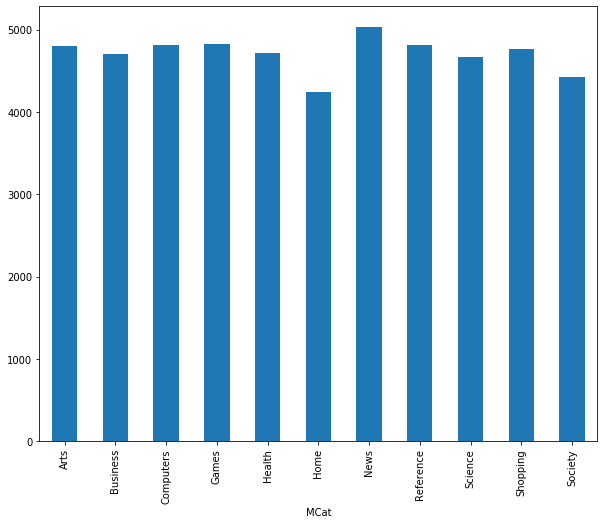

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
websites_df.groupby('MCat').website_url.count().plot.bar()

## Using spacy

In [9]:
import spacy as sp
from collections import Counter
sp.prefer_gpu()
nlp = sp.load("en_core_web_sm")

import re
def clean_text(doc):
    '''
    Clean the document. Remove pronouns, stopwords, lemmatize the words and lowercase them
    '''
    doc = nlp(doc)
    tokens = []
    exclusion_list = ["nan"]
    for token in doc:
        if token.is_stop or token.is_punct or token.text.isnumeric() or (token.text.isalnum()==False) or token.text in exclusion_list :
            continue
        token = str(token.lemma_.lower().strip())
        tokens.append(token)
    return " ".join(tokens) 

clean_text("Hello, my name is Rachhek Shrestha. How are you? machine learning. nan. game and games. 2020. ra12. <, = |")

'hello rachhek shrestha machine learning game game ra12'

In [10]:
websites_df["cleaned_website_text"]  = websites_df.apply(lambda row: clean_text(row["website_text"]) ,axis=1)

In [11]:
websites_df = websites_df.drop(["website_text"],axis=1)

In [12]:
websites_df.head()

,website_url,MCat,cleaned_website_text
0,http://www.ign.com/movies/role-models/theater-...,Arts,ign role models photo video feature message bo...
1,http://www.all-reviews.com/videos/blairwitchpr...,Arts,blair witch project review film movie video re...
2,http://www.ucalgary.ca/UofC/eduweb/engl403/wif...,Arts,wife lament old english text word hot link glo...
3,http://www.codetrip.net/,Arts,franklin martin official site ambient percussi...
4,http://www.picklehead.com/ian/ian_irving.html,Arts,irving berlin hollywood ian whitcomb liner not...


In [13]:
websites_df.to_pickle("./pkl_files/dmoz_subset_51788_sites_scraped_cleaned.pkl")

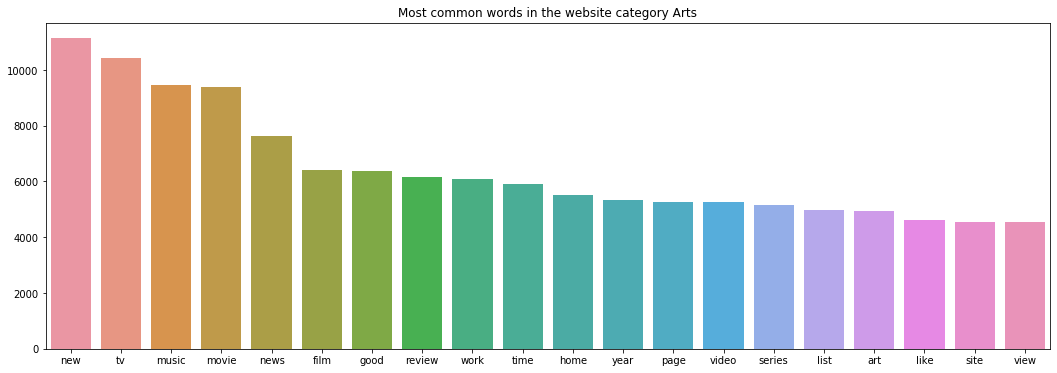

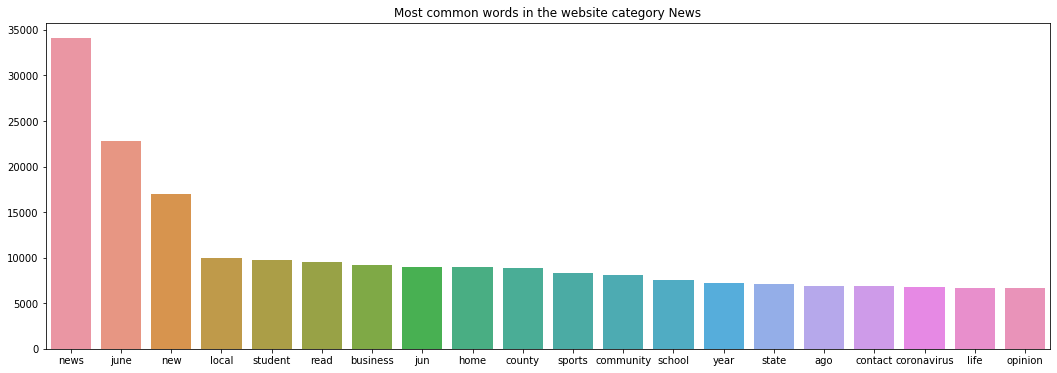

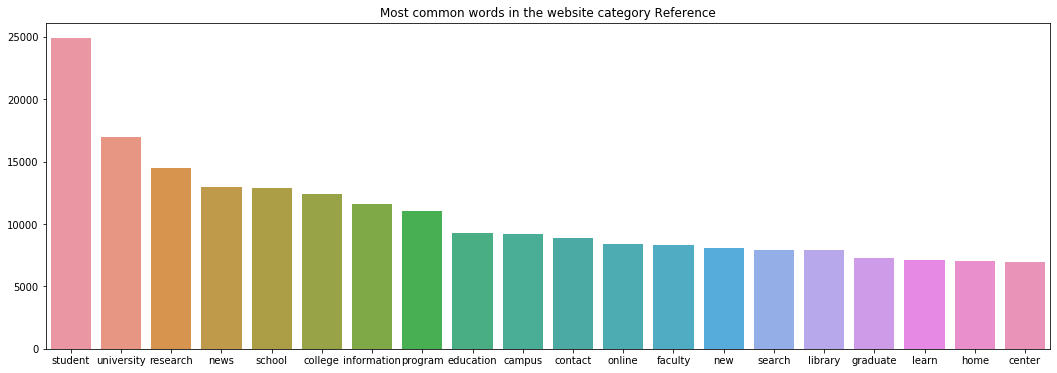

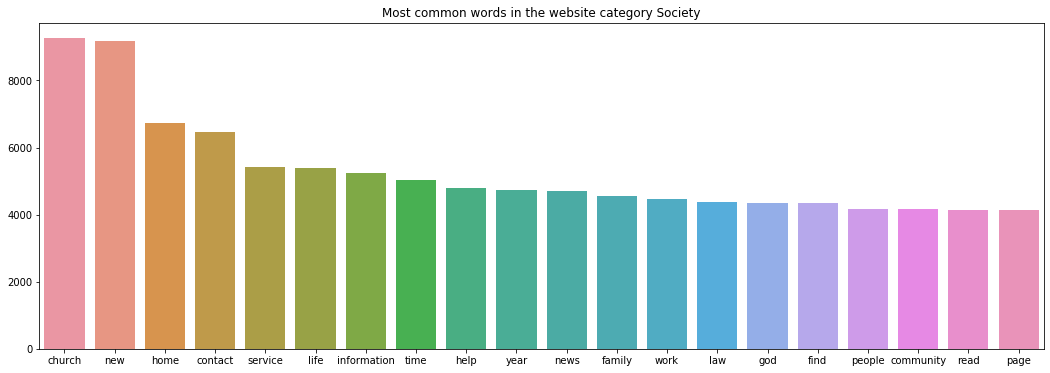

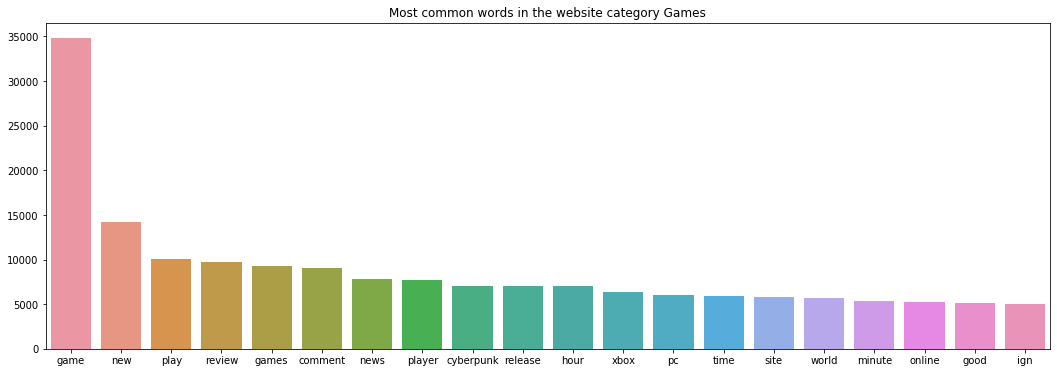

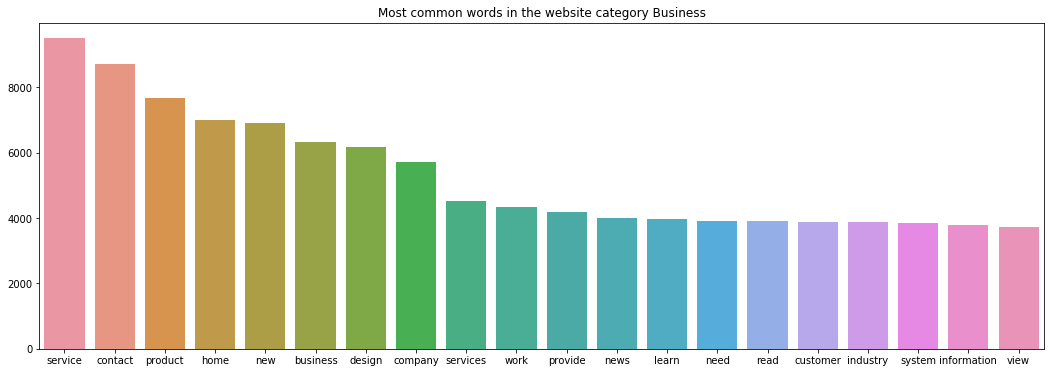

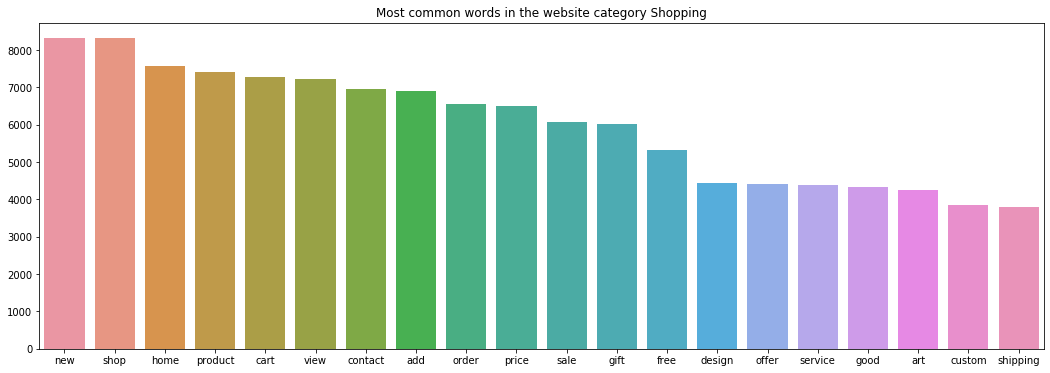

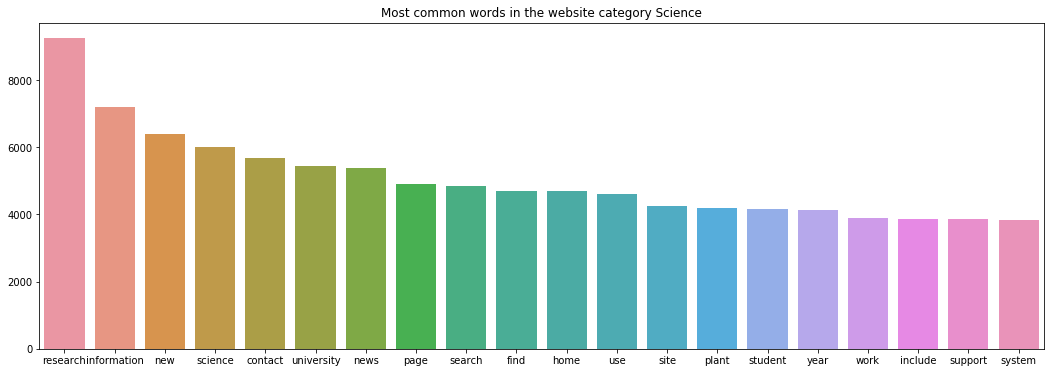

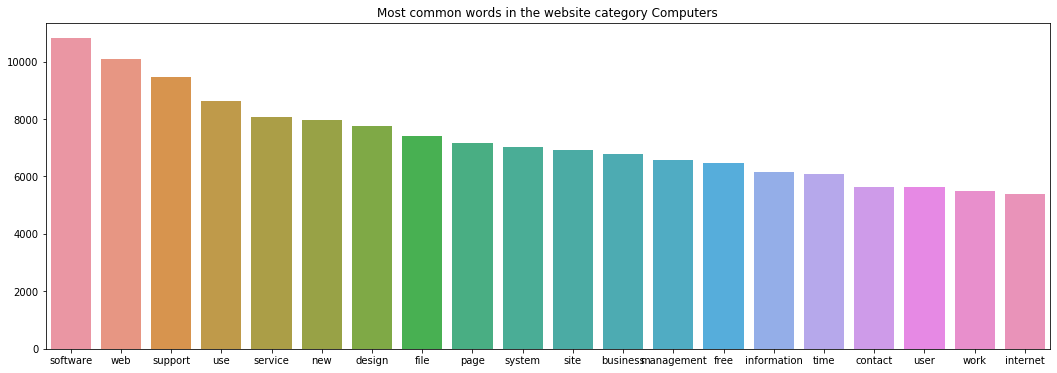

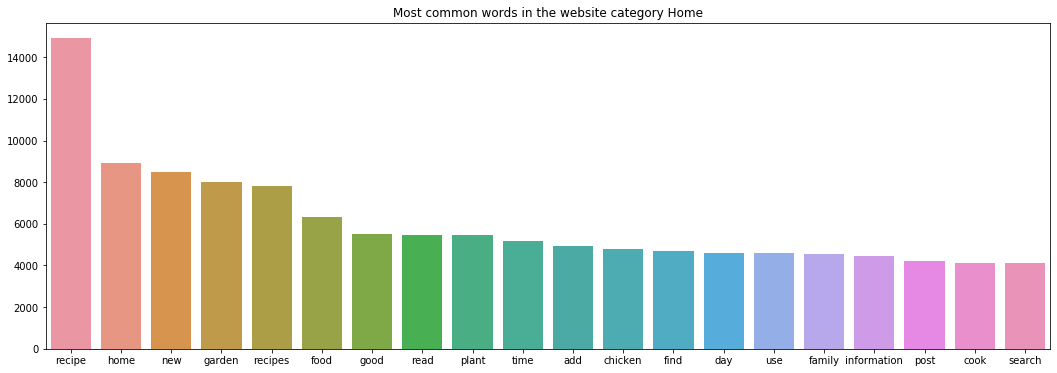

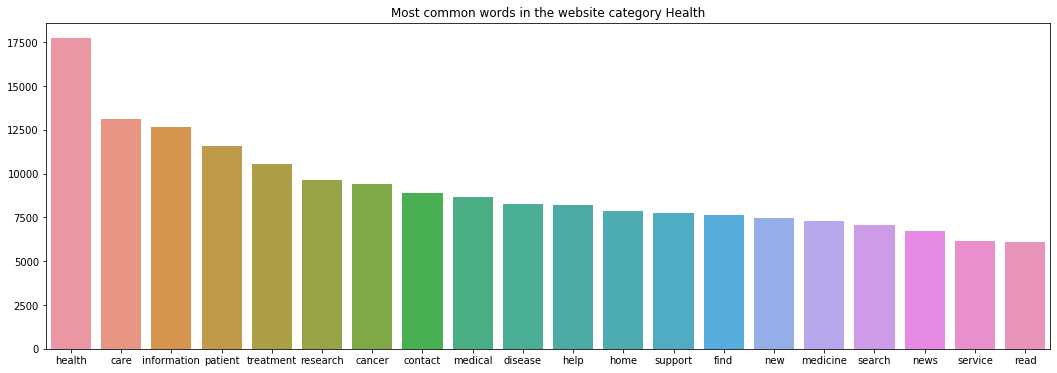

In [18]:
import seaborn as sns
categories = websites_df["MCat"].unique()
categories
for category in categories:
    filtered_category = websites_df[websites_df["MCat"]==category]
    texts = " ".join([row for row in filtered_category["cleaned_website_text"]])
    #print(category)
    #print(Counter(texts.split()).most_common(20))
    top_20_words = [word for word,count in Counter(texts.split()).most_common(20)]
    top_20_counts = [count for word,count in Counter(texts.split()).most_common(20)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=top_20_words,y=top_20_counts)
    plt.title("Most common words in the website category "+ category)
    plt.show()